# RL with Mario - Analytics Notebook
### AI Final Project

This notebook collates all log files from the different model experiments and visualizes relevant model performance metrics. 

- DQN High Learn Rate
- DQN Simple Movement
- DQN Right Only
- DDQN Simple Movement
- DDQN Right Only
- DDQN Modified Decay
- DDQN Random

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


## DQN High Learning Rate

In [2]:
file = "Training Logs/DQN-Large-LR/Combined_Logs_DQN_larger_learnrate"
with open(file, 'r') as f:
    text = f.readlines()
text[:5]

[' Episode    Step   Epsilon     MeanReward     MeanLength       MeanLoss     MeanQValue      TimeDelta                Time\n',
 '       0     113     0.100        602.000        113.000          0.000          0.000          5.020 2024-05-18T16:11:34\n',
 '     100    9437     0.100        451.810         93.240          0.000          0.000        238.183 2024-05-18T16:15:33\n',
 '     200   20442     0.100        519.560        110.050          0.909          5.339        295.978 2024-05-18T16:20:28\n',
 '     300   33294     0.100        614.680        128.520          0.508          5.463        346.745 2024-05-18T16:26:15\n']

In [19]:
to_df = []
for line in text:
    to_df.append(line.strip().split())
to_df[:2]

[['Episode',
  'Step',
  'Epsilon',
  'MeanReward',
  'MeanLength',
  'MeanLoss',
  'MeanQValue',
  'TimeDelta',
  'Time'],
 ['0',
  '113',
  '0.100',
  '602.000',
  '113.000',
  '0.000',
  '0.000',
  '5.020',
  '2024-05-18T16:11:34']]

In [20]:
# fix the column for episodes
dqn_lr = pd.DataFrame(to_df[1:], columns=to_df[0])
ep_col = []
for ep in range(0, 33800, 100):
    ep_col.append(ep)

dqn_lr['Episode'] = ep_col
dqn_lr.set_index('Episode', inplace=True)
dqn_lr

,Step,Epsilon,MeanReward,MeanLength,MeanLoss,MeanQValue,TimeDelta,Time
Episode,,,,,,,,
0,113,0.100,602.000,113.000,0.000,0.000,5.020,2024-05-18T16:11:34
100,9437,0.100,451.810,93.240,0.000,0.000,238.183,2024-05-18T16:15:33
200,20442,0.100,519.560,110.050,0.909,5.339,295.978,2024-05-18T16:20:28
300,33294,0.100,614.680,128.520,0.508,5.463,346.745,2024-05-18T16:26:15
400,47497,0.100,518.810,142.030,0.407,5.214,382.476,2024-05-18T16:32:38
...,...,...,...,...,...,...,...,...
33300,1072233,0.200,581.530,113.580,1.698,7.229,299.874,2024-05-19T23:45:03
33400,1084498,0.200,608.450,122.650,1.712,7.241,324.171,2024-05-19T23:50:27
33500,1095575,0.200,555.990,110.770,1.718,7.239,292.761,2024-05-19T23:55:20


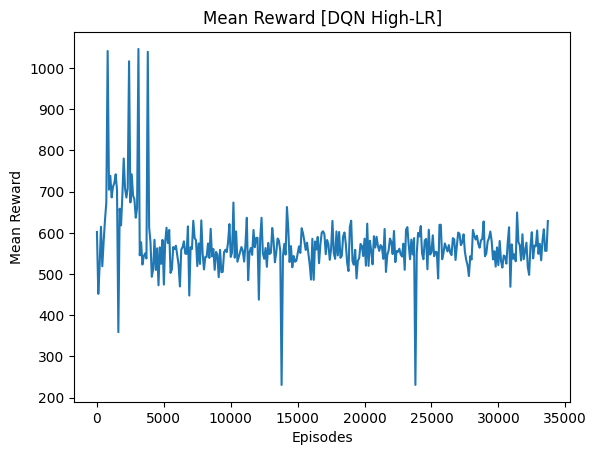

In [21]:
plt.plot(dqn_lr['MeanReward'].astype(float));
plt.xlabel("Episodes");
plt.ylabel("Mean Reward");
plt.title("Mean Reward [DQN High-LR]");

In [51]:
# df.to_csv("Training Logs/DQN-Large-LR/Combined_Logs_DQN_larger_learnrate.csv")

## DQN Simple Movement

In [13]:
dqn_simple = pd.read_csv("Training Logs/DQN SIMPLE MOVEMENT/dqn-simple-movement-combined.csv")
dqn_simple.set_index('Episode', inplace=True)
dqn_simple

,Step,Epsilon,MeanReward,MeanLength,MeanLoss,MeanQValue,TimeDelta,Time
Episode,,,,,,,,
0,60,1.000,219.00,60.00,0.000,0.000,16.852,2024-05-16T19:18:56
100,41449,0.990,583.81,413.89,0.000,0.000,873.171,2024-05-16T19:33:29
200,76282,0.981,560.55,348.33,0.000,0.000,735.556,2024-05-16T19:45:45
300,110850,0.973,626.62,345.68,0.566,0.478,752.488,2024-05-16T19:58:17
400,152747,0.963,603.82,418.97,1.240,3.284,958.105,2024-05-16T20:14:15
...,...,...,...,...,...,...,...,...
25700,1031364,0.173,639.28,235.93,0.603,4.629,619.128,2024-05-20T19:50:08
25800,1052107,0.172,631.06,207.43,0.587,4.844,547.192,2024-05-20T19:59:16
25900,1075473,0.171,672.12,233.66,0.632,5.083,617.256,2024-05-20T20:09:33


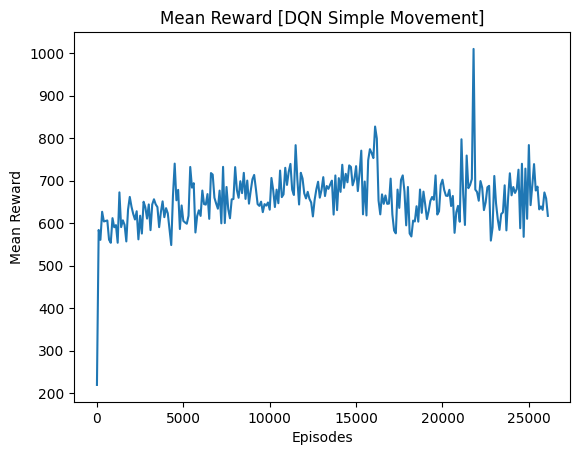

In [14]:
plt.plot(dqn_simple.MeanReward);
plt.xlabel("Episodes");
plt.ylabel("Mean Reward");
plt.title("Mean Reward [DQN Simple Movement]");

## DQN Right-Only

In [16]:
dqn_right = pd.read_csv("Training Logs/DQN RIGHT ONLY/dqn-right-only-combined.csv")
dqn_right.set_index('Episode', inplace=True)
dqn_right

,Step,Epsilon,MeanReward,MeanLength,MeanLoss,MeanQValue,TimeDelta,Time
Episode,,,,,,,,
0,331,1.000,1015.00,331.00,0.000,0.000,15.083,2024-05-15T16:30:20
100,23873,0.994,722.36,235.42,0.000,0.000,496.961,2024-05-15T16:38:37
200,225,0.993,1027.00,225.00,0.000,0.000,9.915,2024-05-15T16:40:53
300,22879,0.988,720.36,226.54,0.000,0.000,475.913,2024-05-15T16:48:49
400,41999,0.983,592.50,191.20,0.000,0.000,404.744,2024-05-15T16:55:33
...,...,...,...,...,...,...,...,...
33000,712449,0.111,549.54,725.99,0.090,2.304,1995.190,2024-05-20T17:51:08
33100,785830,0.109,541.59,733.81,0.074,1.157,2001.794,2024-05-20T18:24:30
33200,881886,0.107,435.22,960.56,0.073,1.063,2650.645,2024-05-20T19:08:40


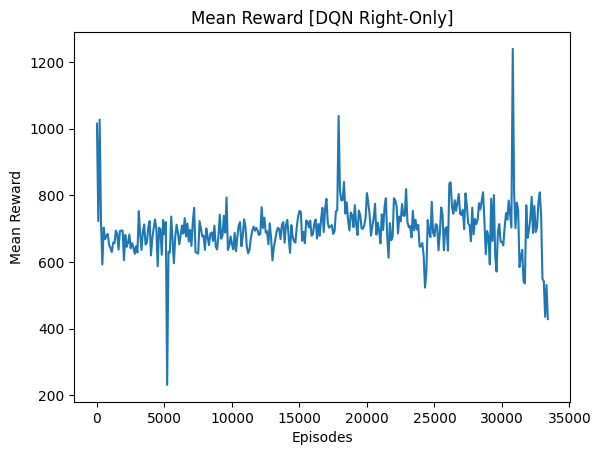

In [17]:
plt.plot(dqn_right.MeanReward);
plt.xlabel("Episodes");
plt.ylabel("Mean Reward");
plt.title("Mean Reward [DQN Right-Only]");

### Comparing all DQN

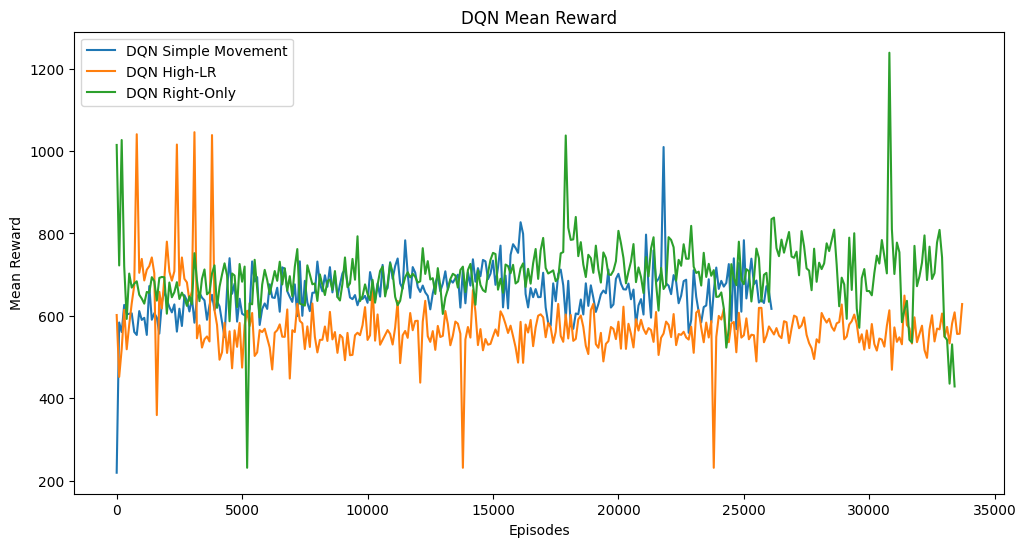

In [25]:
plt.figure(figsize=[12,6])
plt.plot(dqn_simple.MeanReward, label= "DQN Simple Movement");
plt.plot(dqn_lr['MeanReward'].astype(float), label="DQN High-LR");
plt.plot(dqn_right.MeanReward, label= "DQN Right-Only");
plt.xlabel("Episodes");
plt.ylabel("Mean Reward");
plt.legend();
plt.title("DQN Mean Reward");

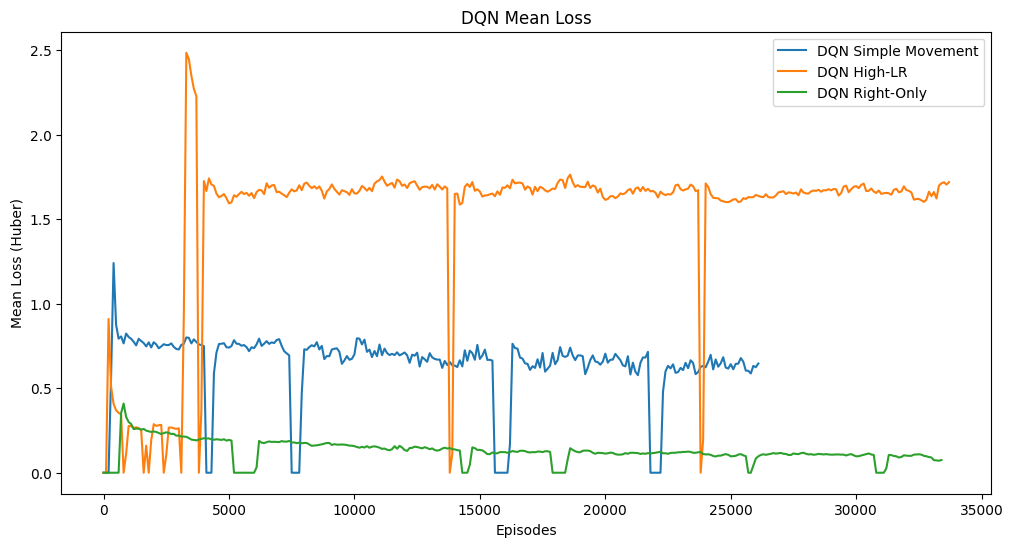

In [33]:
plt.figure(figsize=[12,6])
plt.plot(dqn_simple.MeanLoss, label= "DQN Simple Movement");
plt.plot(dqn_lr['MeanLoss'].astype(float), label="DQN High-LR");
plt.plot(dqn_right.MeanLoss, label= "DQN Right-Only");
plt.xlabel("Episodes");
plt.ylabel("Mean Loss (Huber)");
plt.legend();
plt.title("DQN Mean Loss");

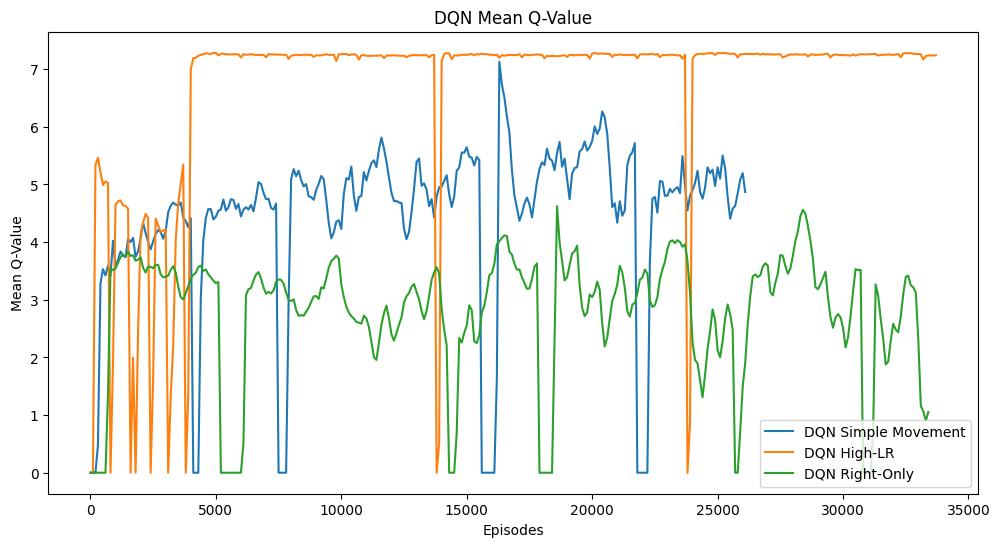

In [40]:
plt.figure(figsize=[12,6])
plt.plot(dqn_simple.MeanQValue, label= "DQN Simple Movement");
plt.plot(dqn_lr['MeanQValue'].astype(float), label="DQN High-LR");
plt.plot(dqn_right.MeanQValue, label= "DQN Right-Only");
plt.xlabel("Episodes");
plt.ylabel("Mean Q-Value");
plt.legend();
plt.title("DQN Mean Q-Value");

## DDQN Right Only

In [26]:
ddqn_right = pd.read_csv("Training Logs/DDQN RIGHT ONLY/Combined_Logs_DDQN_Right_Only.csv")
ddqn_right.set_index('Episode', inplace=True)
ddqn_right

,Step,Epsilon,MeanReward,MeanLength,MeanLoss,MeanQValue,TimeDelta,Time
Episode,,,,,,,,
0,111,1.000,615.00,111.00,0.000,0.000,2.589,2024-05-13T17:02:40
200,44567,0.989,668.37,234.17,0.000,0.000,943.278,2024-05-13T17:18:23
400,84364,0.979,660.63,207.38,0.000,0.000,843.923,2024-05-13T17:32:27
600,124495,0.969,654.77,195.04,0.516,5.725,895.022,2024-05-13T17:47:22
800,164880,0.960,610.37,176.82,0.738,15.112,944.397,2024-05-13T18:03:06
...,...,...,...,...,...,...,...,...
49000,2076111,0.100,1081.29,194.84,1.253,55.678,1250.937,2024-05-18T04:29:30
49200,2124271,0.100,1374.71,252.47,1.246,54.875,1366.666,2024-05-18T04:52:17
49400,2170750,0.100,1203.14,220.57,1.208,55.667,1312.782,2024-05-18T05:14:10


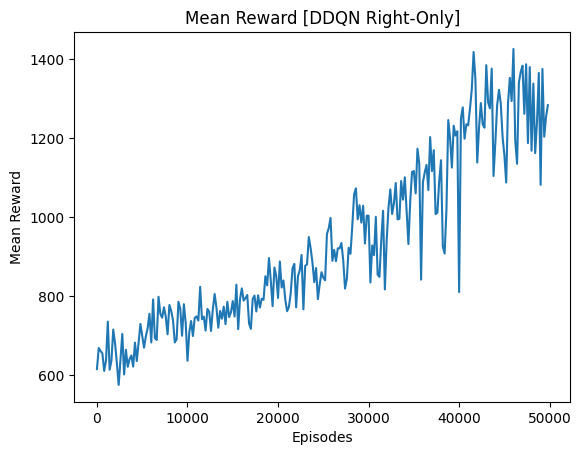

In [27]:
plt.plot(ddqn_right.MeanReward);
plt.xlabel("Episodes");
plt.ylabel("Mean Reward");
plt.title("Mean Reward [DDQN Right-Only]");

## DDQN Simple Movement

In [5]:
ddqn_simp = pd.read_csv("Training Logs/DDQN SIMPLE MOVEMENT/Combined_Logs_DDQN_Simple_Movement.csv")
ddqn_simp.set_index('Episode', inplace=True)
ddqn_simp

,Step,Epsilon,MeanReward,MeanLength,MeanLoss,MeanQValue,TimeDelta,Time
Episode,,,,,,,,
0,154,1.000,637.00,154.00,0.000,0.000,3.600,2024-05-16T03:48:30
200,77973,0.981,619.38,420.58,0.000,0.000,1651.815,2024-05-16T04:16:02
400,143662,0.965,543.29,306.84,1.093,5.082,1468.165,2024-05-16T04:40:30
600,221685,0.946,583.01,441.09,1.890,12.554,1803.969,2024-05-16T05:10:34
800,305847,0.926,565.58,366.41,1.787,13.437,1952.710,2024-05-16T05:43:07
...,...,...,...,...,...,...,...,...
49000,754343,0.100,1457.19,193.70,3.180,77.612,1052.992,2024-05-19T17:15:53
49200,795321,0.100,1664.49,229.91,3.158,78.201,1115.494,2024-05-19T17:34:29
49400,829573,0.100,1370.88,175.95,3.112,81.788,931.688,2024-05-19T17:50:01


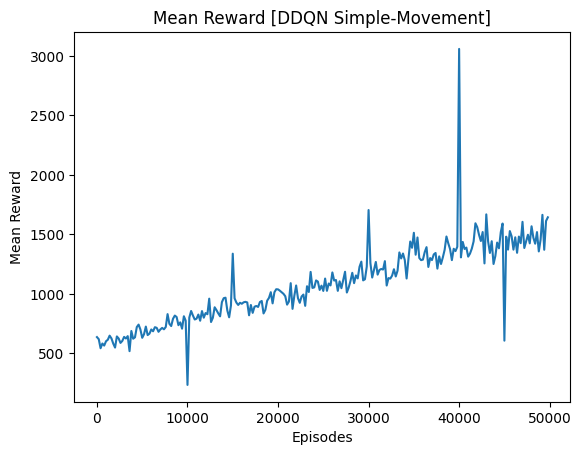

In [6]:
plt.plot(ddqn_simp.MeanReward);
plt.xlabel("Episodes");
plt.ylabel("Mean Reward");
plt.title("Mean Reward [DDQN Simple-Movement]");

## DDQN Modified Decay

In [7]:
ddqn_decay = pd.read_csv("Training Logs/DDQN-Modified-Decay/log_20000_50000_combined.csv")
ddqn_decay.set_index('Episode', inplace=True)
ddqn_decay

,Step,Epsilon,MeanReward,MeanLength,MeanLoss,MeanQValue,TimeDelta,Time
Episode,,,,,,,,
20000,176,0.1,753.00,176.00,0.000,0.000,5.739,2024-05-17T13:10:05
21000,224863,0.1,990.79,198.79,1.319,44.894,6022.347,2024-05-17T14:50:27
22000,437634,0.1,1077.03,223.58,1.323,50.557,5852.277,2024-05-17T16:27:59
23000,638114,0.1,926.70,167.59,1.160,52.896,5448.745,2024-05-17T17:58:48
24000,831696,0.1,1023.33,183.10,1.347,56.984,5220.390,2024-05-17T19:25:48
25000,1019475,0.1,828.61,168.20,1.207,50.879,5068.450,2024-05-17T20:50:17
26000,1231343,0.1,1150.79,231.20,1.190,50.095,5737.769,2024-05-17T22:25:55
27000,1432057,0.1,1111.05,250.23,1.372,52.012,5523.572,2024-05-17T23:57:58
28000,1626966,0.1,1031.69,183.72,1.253,54.572,5405.580,2024-05-18T01:28:04


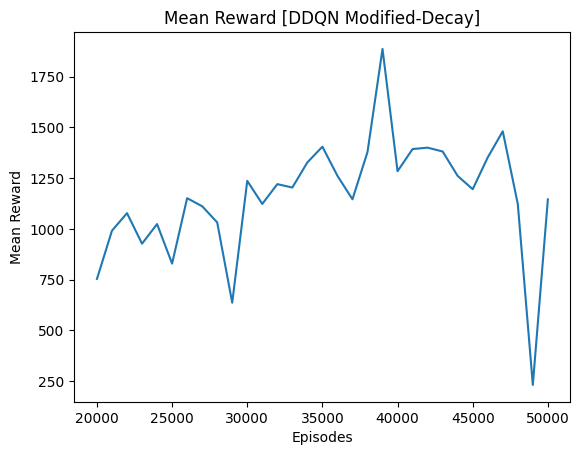

In [8]:
plt.plot(ddqn_decay.MeanReward);
plt.xlabel("Episodes");
plt.ylabel("Mean Reward");
plt.title("Mean Reward [DDQN Modified-Decay]");

## DDQN Random

In [10]:
ddqn_rand = pd.read_csv('Training Logs/DDQN-Random/log_0_20000_combined-2.csv')
ddqn_rand.set_index('Episode', inplace=True)
ddqn_rand

,Step,Epsilon,MeanReward,MeanLength,MeanLoss,MeanQValue,TimeDelta,Time
Episode,,,,,,,,
0,38,0.1,218.00,38.00,0.000,0.000,1.954,2024-05-18T20:58:52
200,24910,0.1,449.32,139.27,0.000,0.000,637.547,2024-05-18T21:09:29
400,51527,0.1,477.19,125.84,0.000,0.000,683.616,2024-05-18T21:20:53
600,74219,0.1,355.32,99.50,0.000,0.000,579.502,2024-05-18T21:30:32
800,89813,0.1,407.46,83.27,0.000,0.000,399.727,2024-05-18T21:37:12
...,...,...,...,...,...,...,...,...
19000,1115930,0.1,721.18,124.03,1.341,50.317,635.381,2024-05-19T23:03:25
19200,1143307,0.1,762.40,141.35,1.389,51.945,754.244,2024-05-19T23:16:00
19400,1174121,0.1,721.71,152.72,1.299,52.869,841.624,2024-05-19T23:30:01


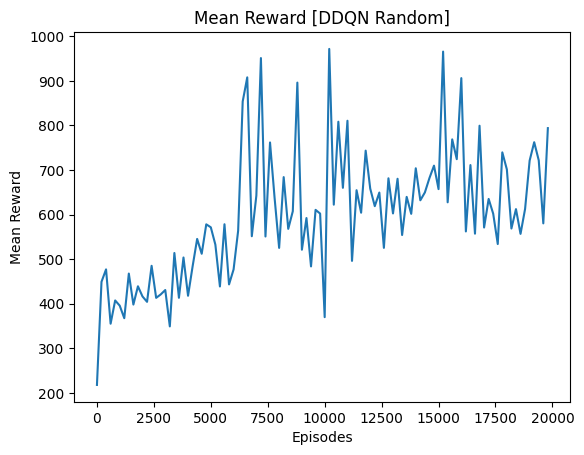

In [11]:
plt.plot(ddqn_rand.MeanReward);
plt.xlabel("Episodes");
plt.ylabel("Mean Reward");
plt.title("Mean Reward [DDQN Random]");

## Comparing all DDQN

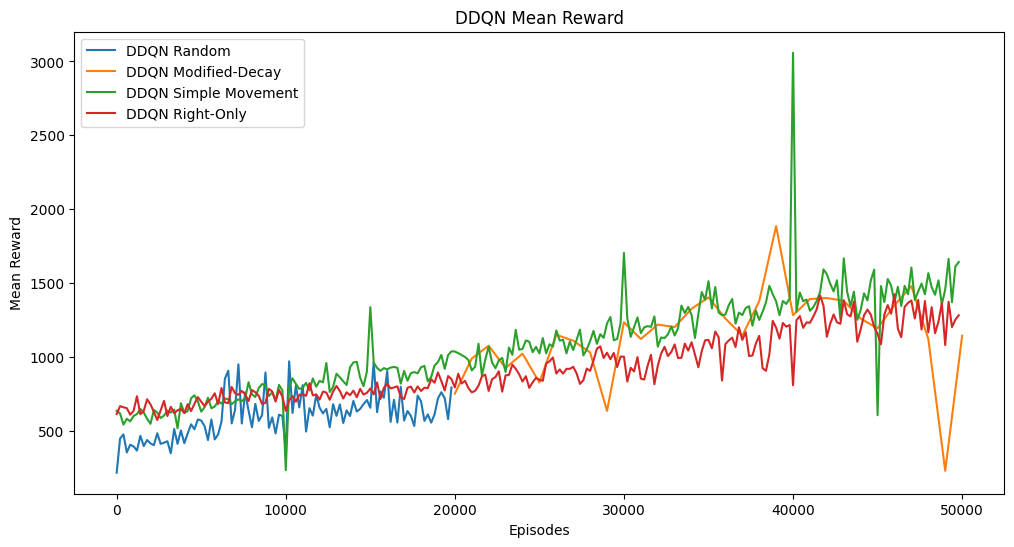

In [28]:
plt.figure(figsize=[12,6])
plt.plot(ddqn_rand.MeanReward, label= "DDQN Random");
plt.plot(ddqn_decay.MeanReward, label= "DDQN Modified-Decay");
plt.plot(ddqn_simp.MeanReward, label= "DDQN Simple Movement");
plt.plot(ddqn_right.MeanReward, label= "DDQN Right-Only");
plt.xlabel("Episodes");
plt.ylabel("Mean Reward");
plt.legend();
plt.title("DDQN Mean Reward");

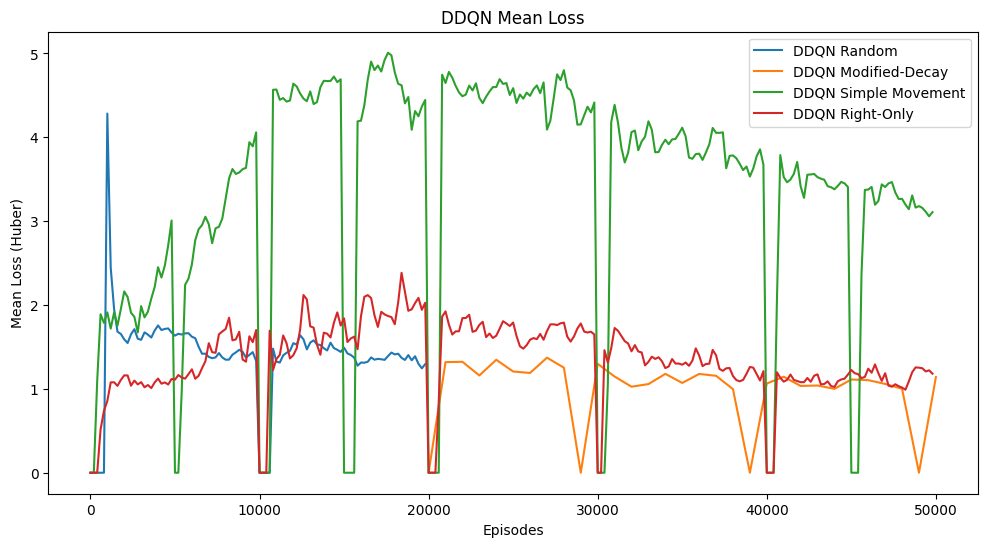

In [34]:
plt.figure(figsize=[12,6])
plt.plot(ddqn_rand.MeanLoss, label= "DDQN Random");
plt.plot(ddqn_decay.MeanLoss, label= "DDQN Modified-Decay");
plt.plot(ddqn_simp.MeanLoss, label= "DDQN Simple Movement");
plt.plot(ddqn_right.MeanLoss, label= "DDQN Right-Only");
plt.xlabel("Episodes");
plt.ylabel("Mean Loss (Huber)");
plt.legend();
plt.title("DDQN Mean Loss");

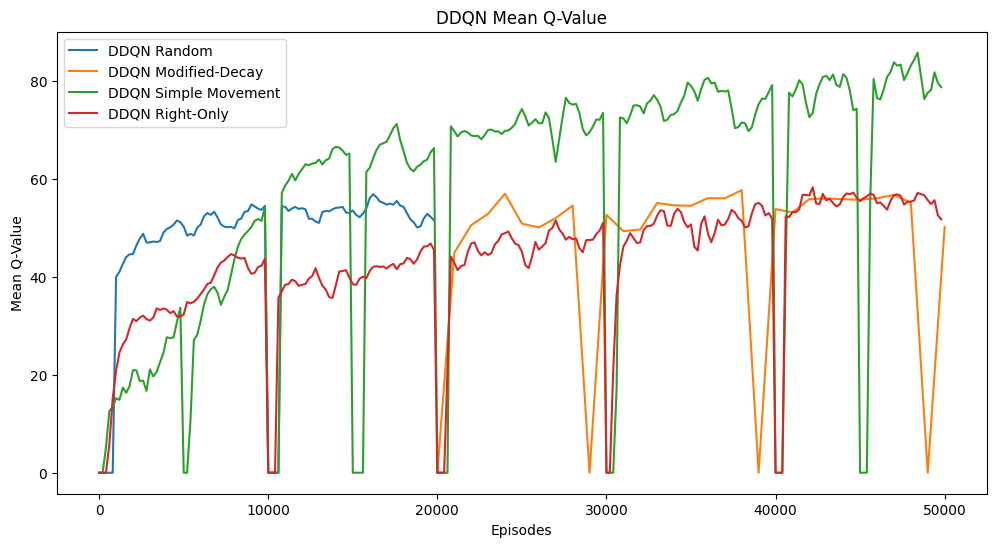

In [39]:
plt.figure(figsize=[12,6])
plt.plot(ddqn_rand.MeanQValue, label= "DDQN Random");
plt.plot(ddqn_decay.MeanQValue, label= "DDQN Modified-Decay");
plt.plot(ddqn_simp.MeanQValue, label= "DDQN Simple Movement");
plt.plot(ddqn_right.MeanQValue, label= "DDQN Right-Only");
plt.xlabel("Episodes");
plt.ylabel("Mean Q-Value");
plt.legend();
plt.title("DDQN Mean Q-Value");

### DQN vs DDQN

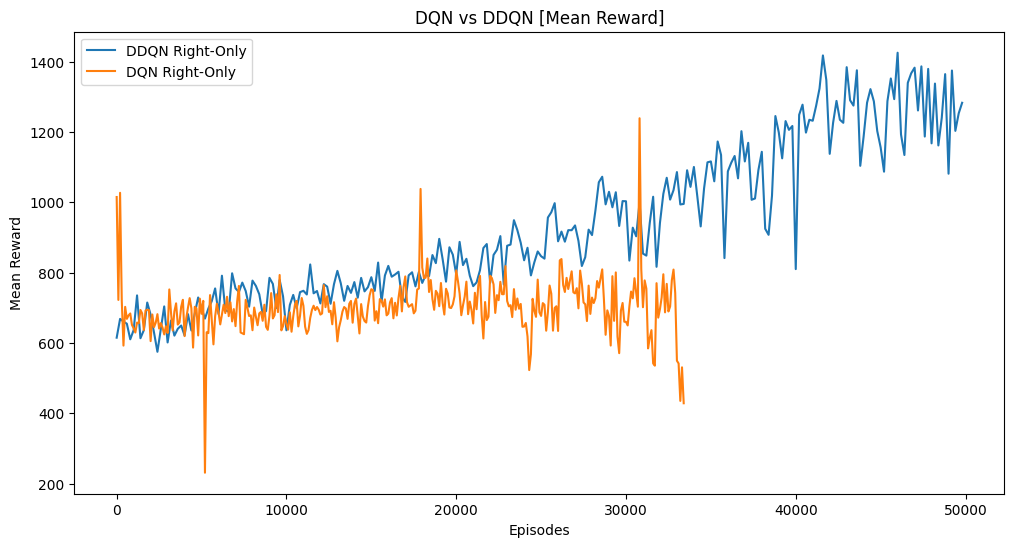

In [36]:
plt.figure(figsize=[12,6])
plt.plot(ddqn_right.MeanReward, label= "DDQN Right-Only");
plt.plot(dqn_right.MeanReward, label= "DQN Right-Only");

plt.xlabel("Episodes");
plt.ylabel("Mean Reward");
plt.legend();
plt.title("DQN vs DDQN [Mean Reward]");

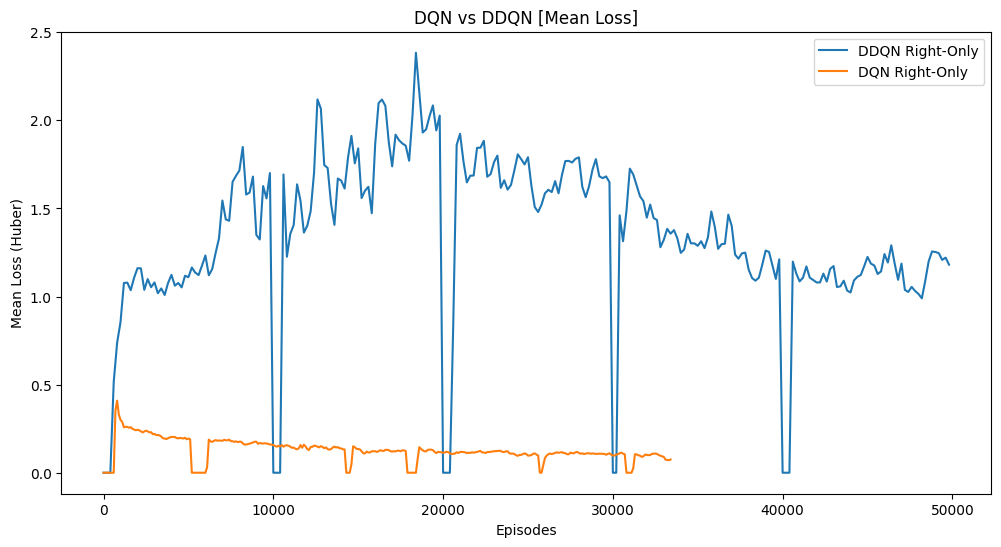

In [37]:
plt.figure(figsize=[12,6])
plt.plot(ddqn_right.MeanLoss, label= "DDQN Right-Only");
plt.plot(dqn_right.MeanLoss, label= "DQN Right-Only");

plt.xlabel("Episodes");
plt.ylabel("Mean Loss (Huber)");
plt.legend();
plt.title("DQN vs DDQN [Mean Loss]");